In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Overview

In [63]:
df = pd.read_parquet('data/cleaned.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32753 entries, 0 to 32752
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID_vend      32753 non-null  category      
 1   ProductID    32753 non-null  category      
 2   ClientID     32753 non-null  int64         
 3   Discount     32753 non-null  float64       
 4   UnitPrice    32753 non-null  float64       
 5   Quantity     32753 non-null  int64         
 6   StoreID      32753 non-null  int64         
 7   Date         32753 non-null  datetime64[ns]
 8   City_cons    32753 non-null  category      
 9   State_cons   32753 non-null  category      
 10  DateOfBirth  32753 non-null  datetime64[ns]
 11  Sex          32753 non-null  category      
 12  Name_loj     32753 non-null  category      
 13  State_loj    32753 non-null  category      
 14  Name_pro     32753 non-null  category      
 15  Size         32753 non-null  category      
 16  Reve

### Selecionando colunas relevantes

- ID_vend pode ser dropada pois é apenas o ID da venda, que não é relevante aqui
- Tendo a idade, não precisamos da data de nascimento


In [64]:
sel_cols = ['ProductID', 'ClientID', 'Discount', 'UnitPrice', 'Quantity','Year', 'Month', 'Day',
       'StoreID', 'Date', 'City_cons', 'State_cons', 'Sex',
       'Name_loj', 'State_loj', 'Name_pro', 'Size', 'Revenue', 'Age']

df = df[sel_cols]

### Quantos produtos únicos foram vendidos?

In [65]:
unique_products = df.query("Quantity>0").ProductID.nunique()
print("Número de produtos únicos:", unique_products)

Número de produtos únicos: 73


### Qual o produto mais vendido e quantos desse produto foram vendidos?

In [66]:
grouped_data = df.groupby('ProductID')['Quantity'].sum().reset_index()

In [67]:
# Encontrando o produto mais vendido e a quantidade vendida
most_sold_product = grouped_data.loc[grouped_data['Quantity'].idxmax()]
product_id = most_sold_product['ProductID']
quantity_sold = most_sold_product['Quantity']
print(f'O produto mais vendido é o de ID {product_id} com {quantity_sold} unidades vendidas.')

O produto mais vendido é o de ID 002ec297b1b00fb9dde7ee6ac24b67713 com 1020 unidades vendidas.


In [68]:
df.query("ProductID == '002ec297b1b00fb9dde7ee6ac24b67713'")

,ProductID,ClientID,Discount,UnitPrice,Quantity,Year,Month,Day,StoreID,Date,City_cons,State_cons,Sex,Name_loj,State_loj,Name_pro,Size,Revenue,Age
19,002ec297b1b00fb9dde7ee6ac24b67713,14007,0.08,218.4,1,2018,12,4,7,2018-12-04,São Paulo,SP,Homem,São Paulo,SP,Bazinga,G,200.928,37
27,002ec297b1b00fb9dde7ee6ac24b67713,14012,0.08,218.4,1,2018,6,25,1,2018-06-25,Florianópolis,SC,Homem,Florianópolis,SC,Bazinga,G,200.928,35
30,002ec297b1b00fb9dde7ee6ac24b67713,14013,0.10,218.4,1,2018,9,25,2,2018-09-25,Rio de Janeiro,RJ,Homem,Rio de Janeiro,RJ,Bazinga,G,196.560,38
47,002ec297b1b00fb9dde7ee6ac24b67713,14019,0.10,218.4,1,2018,11,27,2,2018-11-27,Rio de Janeiro,RJ,Mulher,Rio de Janeiro,RJ,Bazinga,G,196.560,32
50,002ec297b1b00fb9dde7ee6ac24b67713,14020,0.08,218.4,1,2018,12,31,2,2018-12-31,Rio de Janeiro,RJ,Homem,Rio de Janeiro,RJ,Bazinga,G,200.928,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32701,002ec297b1b00fb9dde7ee6ac24b67713,28677,0.08,218.4,1,2019,6,21,4,2019-06-21,Curitiba,PR,Homem,Curitiba,PR,Bazinga,G,200.928,31
32702,002ec297b1b00fb9dde7ee6ac24b67713,28678,0.08,218.4,1,2018,6,26,3,2018-06-26,Porto Alegre,RS,Homem,Porto Alegre,RS,Bazinga,G,200.928,33
32706,002ec297b1b00fb9dde7ee6ac24b67713,28679,0.08,218.4,1,2018,12,13,3,2018-12-13,Porto Alegre,RS,Homem,Porto Alegre,RS,Bazinga,G,200.928,55
32742,002ec297b1b00fb9dde7ee6ac24b67713,28692,0.08,218.4,1,2018,6,15,3,2018-06-15,Porto Alegre,RS,Homem,Porto Alegre,RS,Bazinga,G,200.928,32


### Monthly quantity sold of Iron man G in 2019

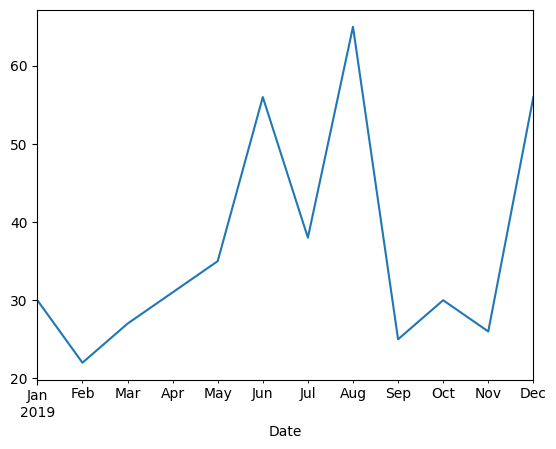

In [69]:
df.query('ProductID =="002d4ea7c04739c130bb74d7e7cd16943" and Year == 2019').set_index('Date').resample('M').sum()['Quantity'].plot();

### Considerando a receita líquida mensal de vendas em 2019. Quais os valores de: média, mediana e desvio padrão desses valores? 

In [70]:
sum_2019 = df.query('Year == 2019').set_index('Date').resample('M').sum()
sum_2019['Revenue'].describe().round(2)

count        12.00
mean     294265.09
std       99304.56
min      168483.42
25%      238564.94
50%      257390.91
75%      323938.80
max      456192.86
Name: Revenue, dtype: float64

### Ainda considerando os dados de receita líquida de vendas em 2019, seu time deve focar esforços em uma das lojas para criar análises mais profundas e a primeira versão do modelo preditivo. Qual destas lojas você escolheria para prosseguir com o projeto? 

In [71]:
df.query('Year == 2019').groupby('Name_loj')['Revenue'].sum().sort_values(ascending=False)

Name_loj
Florianópolis     900116.560
Rio de Janeiro    723401.616
Porto Alegre      668055.752
Curitiba          560306.096
São Paulo         384675.676
Belo Horizonte    192494.652
Online            102130.784
Name: Revenue, dtype: float64

In [72]:
df.Name_loj.value_counts()

Florianópolis     8230
Rio de Janeiro    6838
Porto Alegre      6167
Curitiba          5172
São Paulo         3588
Belo Horizonte    1845
Online             913
Name: Name_loj, dtype: int64

In [73]:
df.Name_loj.value_counts(normalize=True)

Florianópolis     0.251275
Rio de Janeiro    0.208775
Porto Alegre      0.188288
Curitiba          0.157909
São Paulo         0.109547
Belo Horizonte    0.056331
Online            0.027875
Name: Name_loj, dtype: float64

### Revenue

In [74]:
df.Revenue.describe()

count    32753.000000
mean       212.922520
std        120.983188
min        103.320000
25%        144.900000
50%        188.048000
75%        215.096000
max       1262.240000
Name: Revenue, dtype: float64

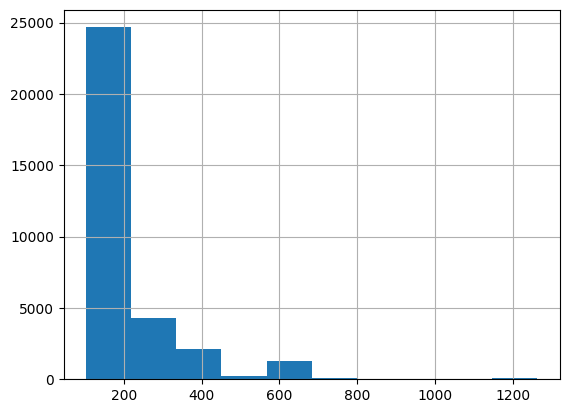

In [75]:
df.Revenue.hist();

### Unit Price

In [76]:
df.UnitPrice.describe()

count    32753.000000
mean       221.644967
std        112.535304
min        114.800000
25%        161.000000
50%        204.400000
75%        233.800000
max        686.000000
Name: UnitPrice, dtype: float64

In [77]:
df.Name_pro.value_counts().sort_values(ascending=False)

Iron Man               1420
League Legends         1403
Capitã Marvel          1399
Thanos                 1388
Ciclope                1386
Homer Simpsons         1382
Super Mario            1381
Bazinga                1380
Deadpool               1378
Batman                 1373
Wolverine              1372
Coringa                1369
Dragon Ball Z          1366
Flash                  1363
Pokemon Go Squirtle    1362
Mulher-Maravilha       1359
Rick Morty             1358
Darth Vader            1357
BIXDream               1347
Thor                   1333
Capitão América        1331
Pantera Negra          1323
Tempestade             1318
Naruto                 1305
Name: Name_pro, dtype: int64

## Structure Investigation

In [78]:
df.shape

(32753, 19)

### Structure of non-numerical features

In [79]:
df.select_dtypes(exclude="number").head()

,ProductID,Date,City_cons,State_cons,Sex,Name_loj,State_loj,Name_pro,Size
0,002552c0663708129c0019cc97552d7d3,2018-12-10,Curitiba,PR,Homem,Curitiba,PR,Tempestade,G
1,001b237c0e9bb435f2e54071129237e93,2019-04-25,Curitiba,PR,Homem,Curitiba,PR,Thanos,G
2,00066f42aeeb9f3007548bb9d3f33c381,2019-07-17,Curitiba,PR,Homem,Curitiba,PR,Capitão América,P
3,001b72dfd63e9833e8c02742adf472e33,2018-04-10,Florianópolis,SC,Homem,Florianópolis,SC,Wolverine,G
4,00210e41887c2a8ef9f791ebc780cc363,2019-01-21,Florianópolis,SC,Homem,Florianópolis,SC,Naruto,G


In [80]:
df.describe(exclude="number", datetime_is_numeric=True)


,ProductID,Date,City_cons,State_cons,Sex,Name_loj,State_loj,Name_pro,Size
count,32753,32753,32753,32753,32753,32753,32753,32753,32753
unique,73,NaN,123,18,2,7,7,24,4
top,002ec297b1b00fb9dde7ee6ac24b67713,NaN,Florianópolis,SC,Homem,Florianópolis,SC,Iron Man,G
freq,966,NaN,8207,8230,28705,8230,8230,1420,21599
mean,NaN,2019-01-22 12:02:10.577351680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2018-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2018-08-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2018-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2019-07-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2020-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Structure of numerical features


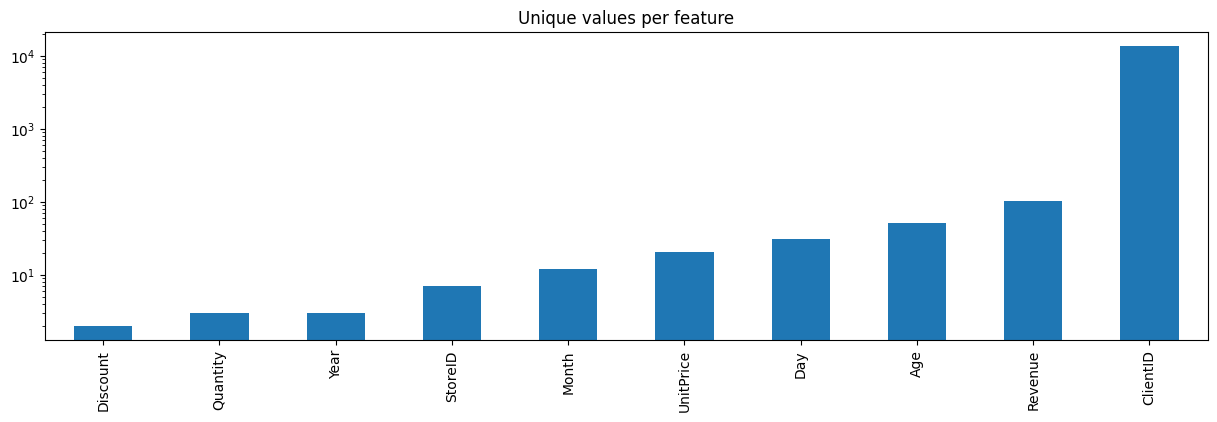

In [81]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

## Quality Investigation

### Unwanted entries and recording errors

#### Numerical features

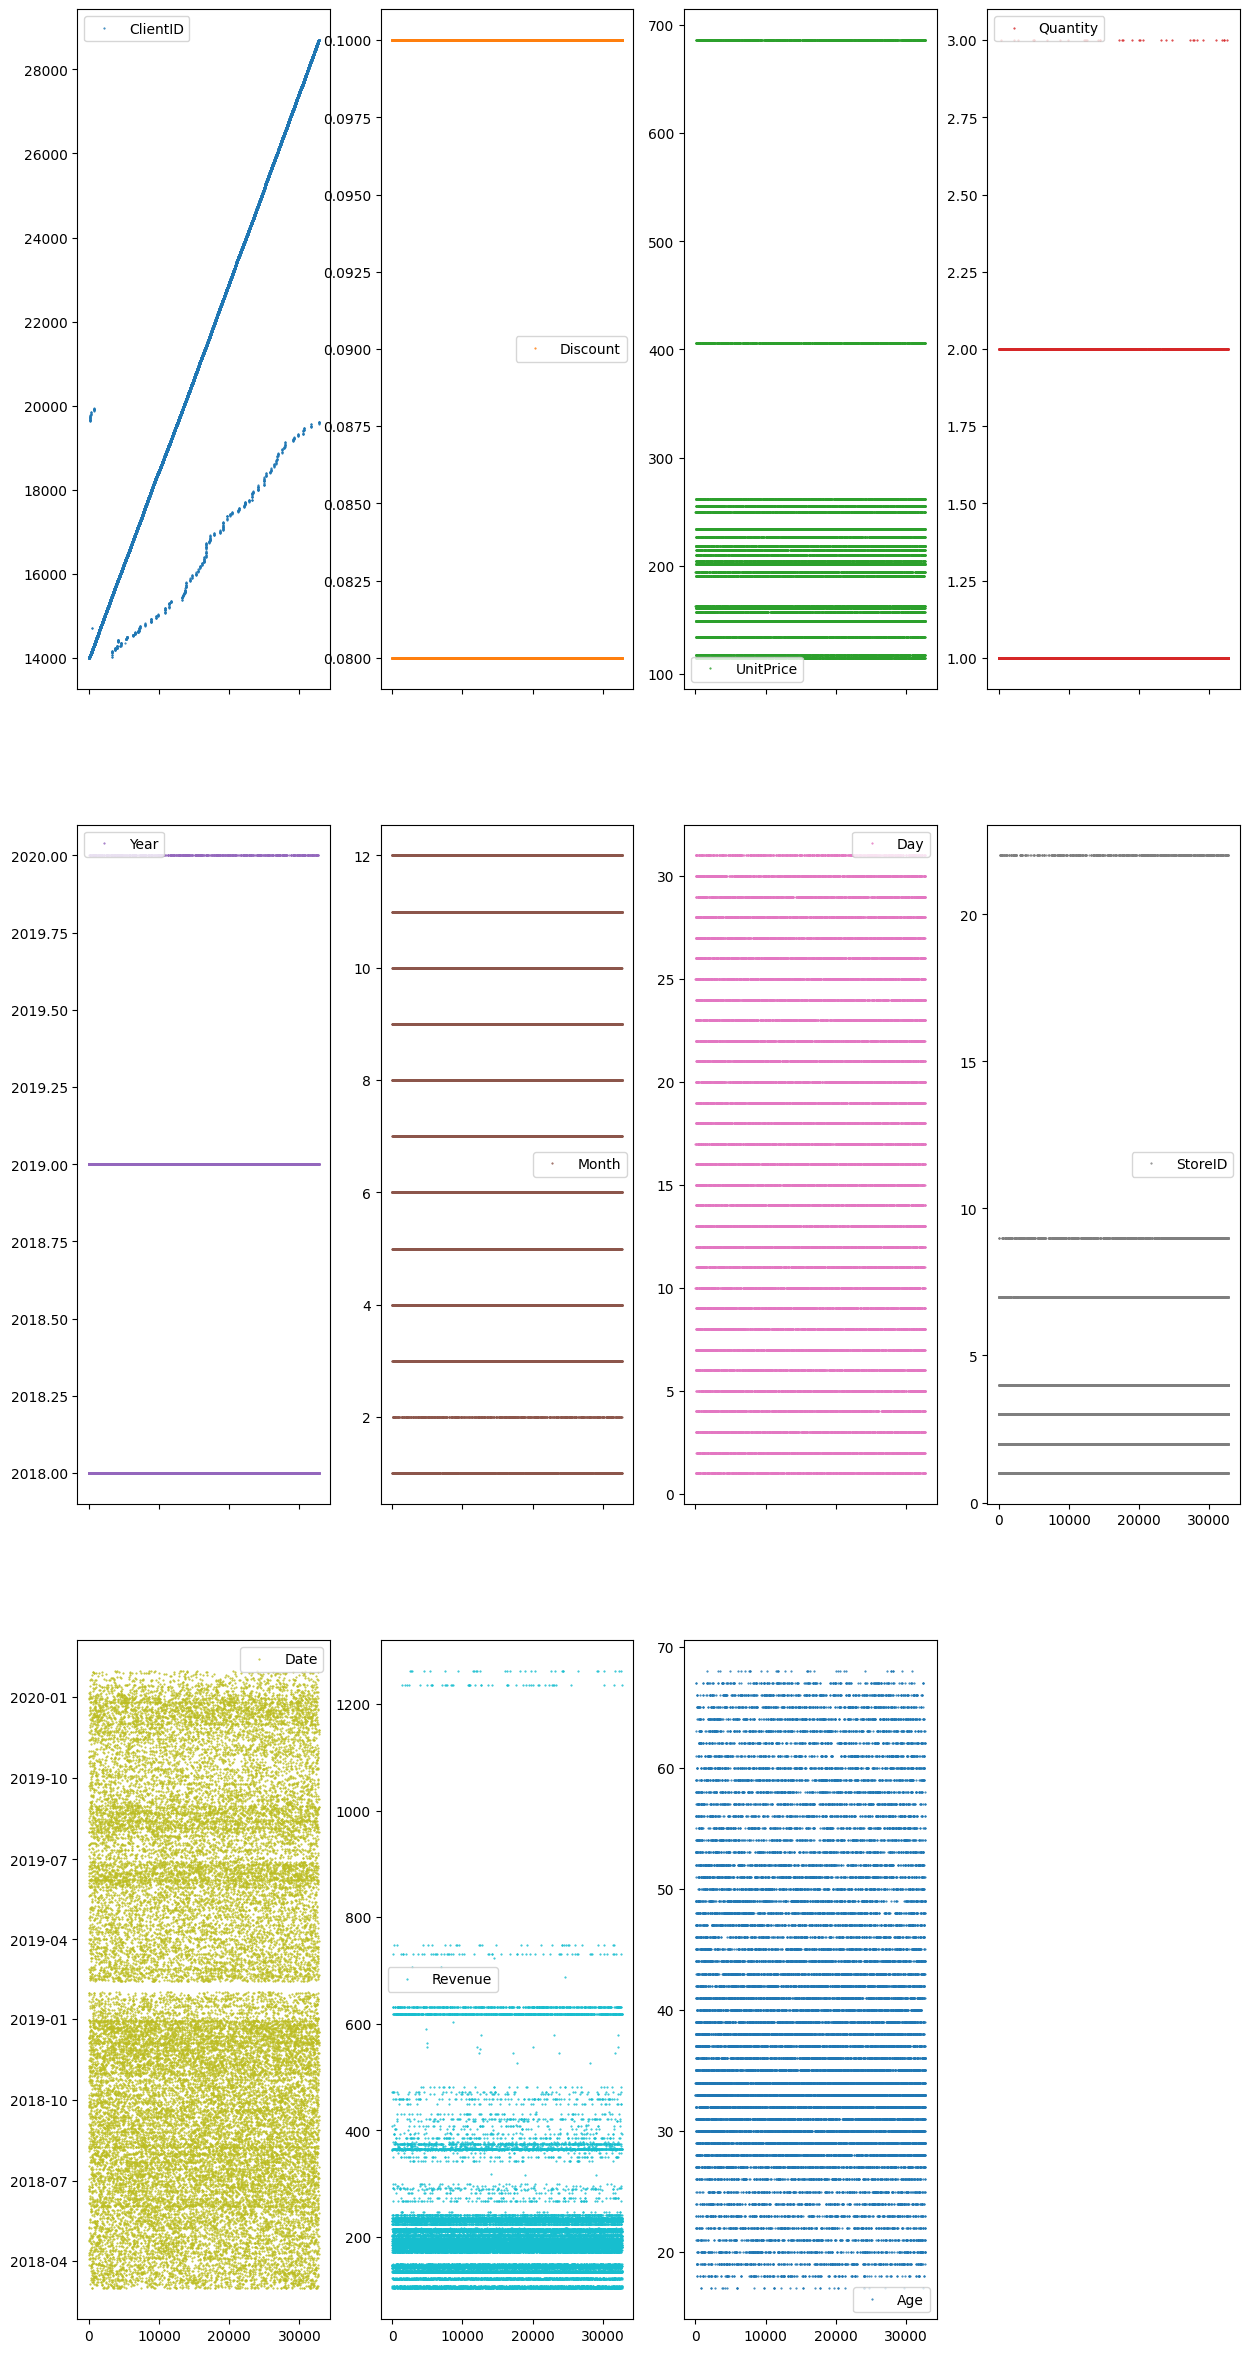

In [82]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);


#### Non-numerical features

In [83]:
# Extract descriptive properties of non-numerical features
df.describe(exclude=["number", "datetime"])


,ProductID,City_cons,State_cons,Sex,Name_loj,State_loj,Name_pro,Size
count,32753,32753,32753,32753,32753,32753,32753,32753
unique,73,123,18,2,7,7,24,4
top,002ec297b1b00fb9dde7ee6ac24b67713,Florianópolis,SC,Homem,Florianópolis,SC,Iron Man,G
freq,966,8207,8230,28705,8230,8230,1420,21599


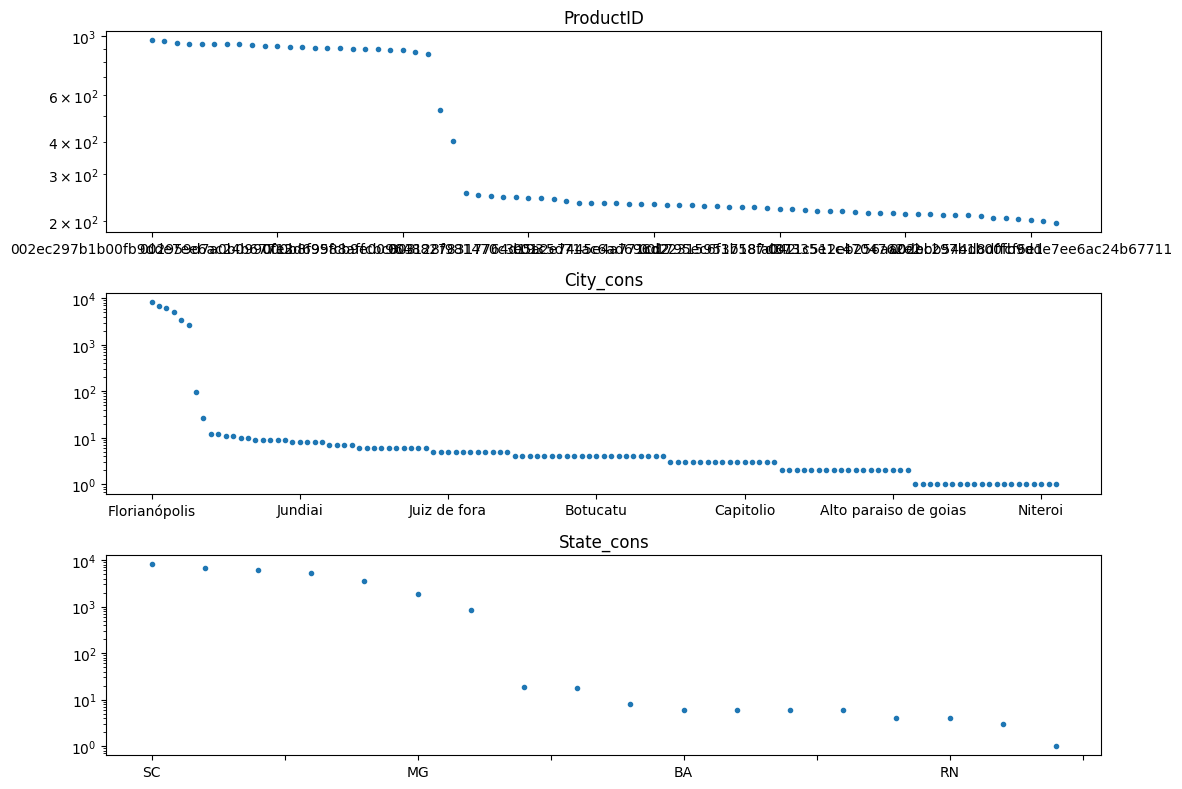

In [84]:
import matplotlib.pyplot as plt

# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();


##  Content Investigation

### Feature distribution

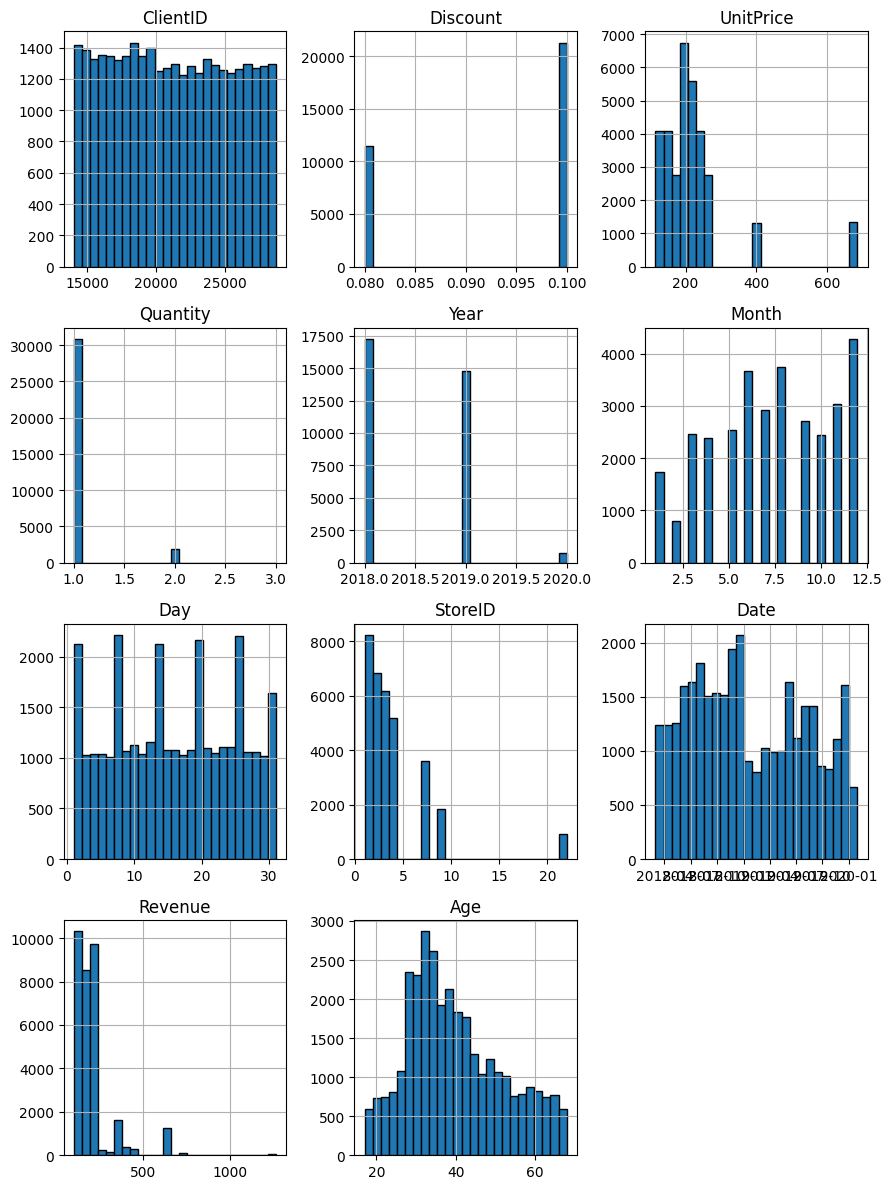

In [85]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(9, 12), layout=(-1, 3), edgecolor="black")
plt.tight_layout();


### Continuous features


In [86]:
df.columns

Index(['ProductID', 'ClientID', 'Discount', 'UnitPrice', 'Quantity', 'Year',
       'Month', 'Day', 'StoreID', 'Date', 'City_cons', 'State_cons', 'Sex',
       'Name_loj', 'State_loj', 'Name_pro', 'Size', 'Revenue', 'Age'],
      dtype='object')

In [87]:
# Create a new dataframe which only contains the continuous features

cols_continuous = df.select_dtypes(include="number").nunique() >= 25

df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape

(32753, 4)

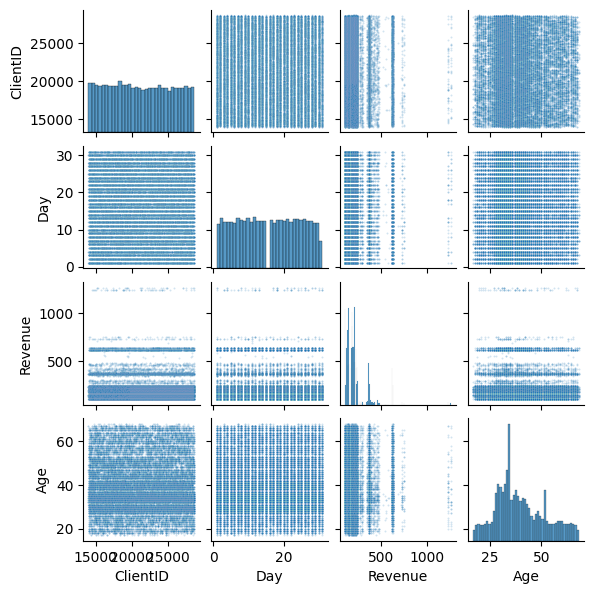

In [88]:
sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});


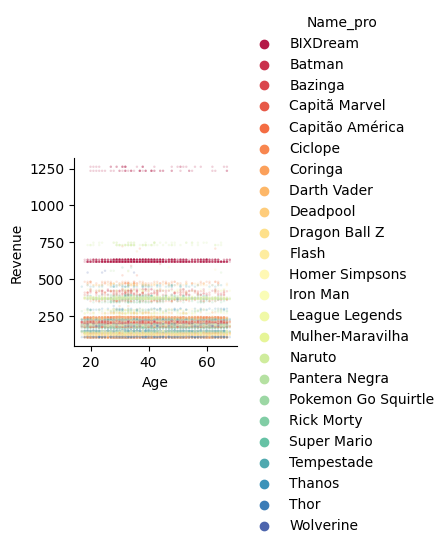

In [89]:
sns.pairplot(
    df, plot_kws={"s": 3, "alpha": 0.2}, hue="Name_pro", palette="Spectral",
    x_vars=["Age"],
    y_vars="Revenue");


### Correlations

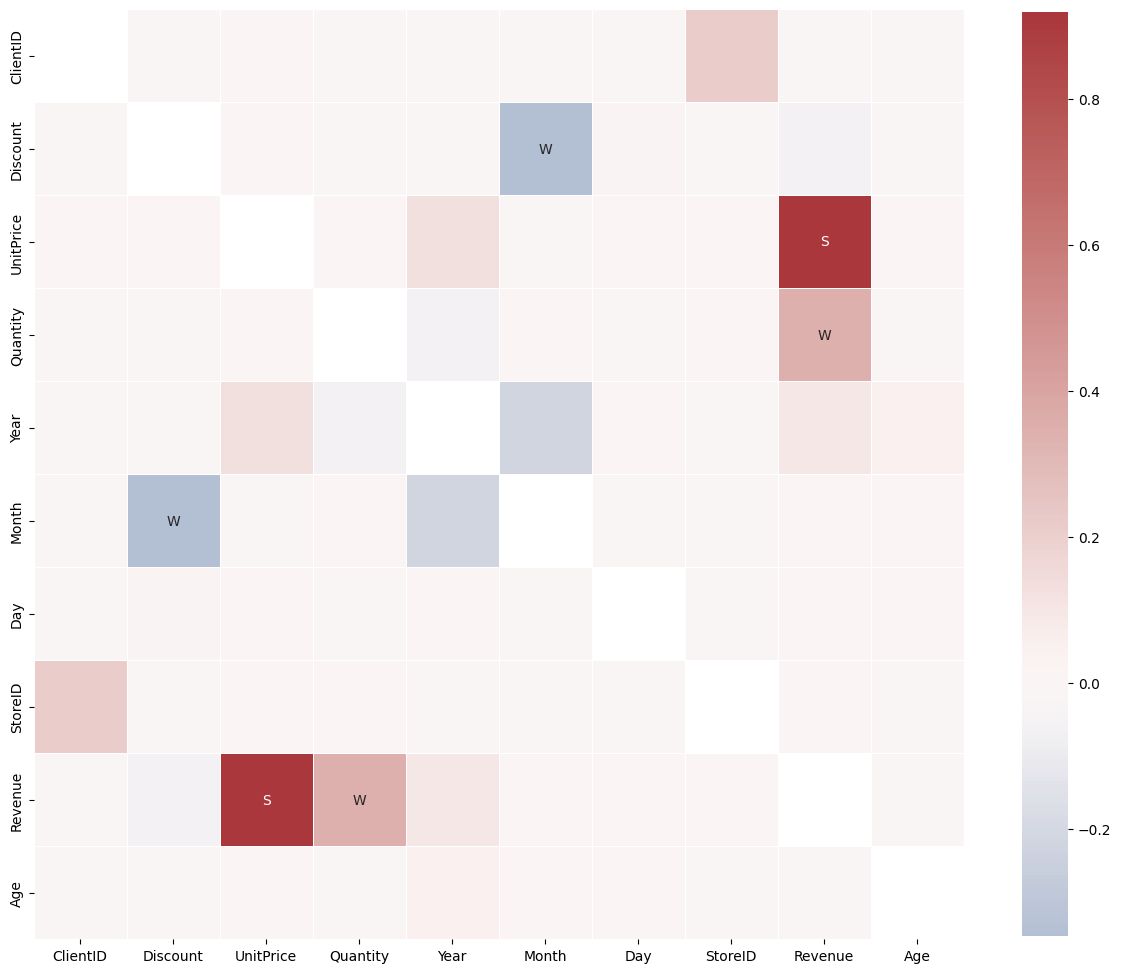

In [90]:
# Computes feature correlation
df_corr = df.corr(method="spearman")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});
